# EDA, o Exploratory Data Analysis. 

Lo primero, primerisimo que debemos hacer cuando recibimos o nos descargamos un conjunto de datos, es **entenderlos**. 

En este curso vamos a trabajar con un conunto de datos sobre pinguinos. Basicamente, un grupo de cientificos acuden a diversas islas del Archipielago Palmer y proceden a medir y pesar diferentes especies de pinguinos en diferentes islas. Estas campanyas, llevadas a cabo a lo largo de diferentes anios, nos proporcionan un dataset unico, y muy util para aprender a explorar nuestros datos.

## El notebook contiene 3 partes principales:

1. Abrir y cargar los modulos necesarios.
2. Cargar los datos y leerlos. Documentar que contiene cada columna:
   - Que tipo de datos son? Cualitativos, cuantitativos? Continuos, Discretos? Numericos?
   - Que describe cada columna?
3. Exploratory data analysis o EDA. Esta es la clave de la clase de hoy. Aprender herramientas que de forma senzilla os permitan crear figuras para una primera reunion sobre vuestros datos. Incluso, utilizar estas figuras para un report, articulo o vuestro TFG/TFM.
   


# 1) Cargar los paquetes necesarios.

In [79]:
import numpy as np  # Biblioteca para operaciones numéricas y manejo de arrays eficientes
import pandas as pd  # Manejo y análisis de datos en estructuras tipo DataFrame y Series (muy util para evi

import matplotlib.pyplot as plt  # Generación de gráficos y visualización de datos
import seaborn as sns  # Biblioteca basada en Matplotlib para gráficos estadísticos mejorados

from scipy.stats import shapiro  # Función para realizar la prueba de normalidad de Shapiro-Wilk
import scipy.stats as stats  # Módulo de estadísticas de SciPy para pruebas y distribuciones

import warnings  
warnings.filterwarnings('ignore')  # Ignorar advertencias para evitar mensajes innecesarios en la salida


# 2) Abrir los datos. 
**pd.read_csv()** → Usa Pandas para leer un archivo CSV (Comma-Separated Values). <p>
**'../../datos/kaggle/penguins/palmerpenguins_original.csv'** → Especifica la ruta del archivo CSV que se va a leer.<p>
**palmerpenguins_original.csv**→ Es el nombre del archivo CSV que contiene los datos.<p>
**df =** → Guarda el contenido del archivo en un DataFrame de Pandas, que es una estructura de datos tabular (como una hoja de Excel).<p>

### 📌 Pandas: Formatos de Archivo y Funciones  

Pandas admite varios formatos de archivo para el análisis de datos. A continuación, una guía rápida:  

### 🗂️ **Formatos de Archivo Comunes**  

| Tipo de Archivo        | Función                     | Descripción |
|-----------------|----------------------------|-------------|
| **CSV** (Valores Separados por Comas) | `pd.read_csv("archivo.csv")` | Lee un archivo CSV |
| **Excel** (.xlsx, .xls) | `pd.read_excel("archivo.xlsx")` | Lee un archivo de Excel |
| **JSON** (JavaScript Object Notation) | `pd.read_json("archivo.json")` | Lee un archivo JSON |
| **Parquet** (Formato optimizado por columnas) | `pd.read_parquet("archivo.parquet")` | Lee un archivo Parquet |
| **SQL** (Bases de Datos) | `pd.read_sql("SELECT * FROM tabla", conn)` | Lee datos desde una base de datos SQL |
| **HDF5** (Formato de Datos Jerárquico) | `pd.read_hdf("archivo.h5")` | Lee un archivo HDF5 |
| **Feather** (Formato binario rápido) | `pd.read_feather("archivo.feather")` | Lee un archivo Feather |
| **ORC** (Optimized Row Columnar) | `pd.read_orc("archivo.orc")` | Lee un archivo ORC |
| **Stata** (Formato de software estadístico) | `pd.read_stata("archivo.dta")` | Lee un archivo Stata |
| **SPSS** (.sav) | `pd.read_spss("archivo.sav")` | Lee un archivo SPSS |
| **Portapapeles** (Datos copiados) | `pd.read_clipboard()` | Lee datos copiados en el portapapeles |

### 📝 **Guardar Datos con Pandas**  

| Tipo de Archivo | Función | Descripción |
|-----------|----------|-------------|
| **CSV** | `df.to_csv("archivo.csv", index=False)` | Guarda un DataFrame como CSV |
| **Excel** | `df.to_excel("archivo.xlsx", index=False)` | Guarda un DataFrame como archivo de Excel |
| **JSON** | `df.to_json("archivo.json")` | Guarda un DataFrame como JSON |
| **Parquet** | `df.to_parquet("archivo.parquet")` | Guarda un DataFrame como archivo Parquet |
| **SQL** | `df.to_sql("nombre_tabla", conn, if_exists="replace")` | Guarda un DataFrame en una tabla SQL |
| **HDF5** | `df.to_hdf("archivo.h5", key="df", mode="w")` | Guarda un DataFrame como archivo HDF5 |

📌 **Nota:** Algunos formatos (como Excel, SQL y HDF5) requieren librerías adicionales como `openpyxl`, `sqlalchemy` o `tables`.  



In [2]:
df = pd.read_csv('../../datos/kaggle/penguins/palmerpenguins_original.csv')

## Antes de nada, como es un pinguino?

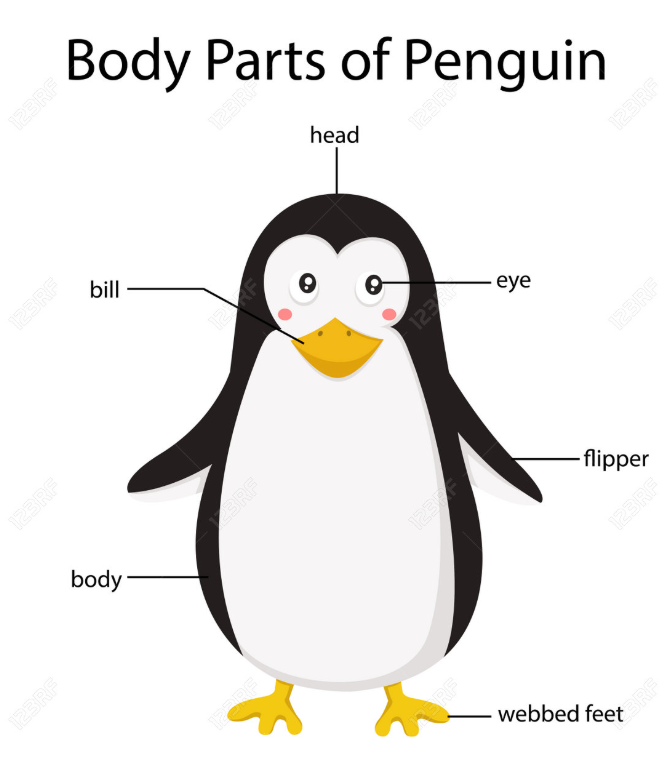

# 3) 📊 Análisis Exploratorio de Datos (EDA)

## ¿Qué es el EDA?

El **Análisis Exploratorio de Datos (EDA, por sus siglas en inglés)** es una fase clave en cualquier proyecto de análisis o modelado de datos. Su objetivo principal es comprender la estructura, patrones y características del conjunto de datos antes de aplicar modelos estadísticos o de aprendizaje automático.

El EDA permite:
- Identificar valores atípicos (outliers) y datos faltantes.
- Entender la distribución de las variables.
- Explorar relaciones entre las variables.
- Evaluar la calidad y limpieza de los datos.

---

## 🔹 Pasos en un Análisis Exploratorio de Datos

### 1️⃣ Carga y comprensión inicial de los datos  ✅ 
   - **Importar los datos** usando `pandas` en Python:  
     ```python
     import pandas as pd
     df = pd.read_csv("archivo.csv")
     ```
   - **Mostrar las primeras filas** del dataset para una vista rápida:  
     ```python
     df.head()
     ```
   - **Obtener el tamaño del dataset** (número de filas y columnas):  
     ```python
     df.shape
     ```

### 2️⃣ Análisis de valores faltantes  
   - Ver cuántos valores faltantes tiene cada columna:  
     ```python
     df.isnull().sum()
     ```
   - Opciones para manejar los valores nulos:
     - Eliminarlos (`df.dropna()`)
     - Rellenarlos con la media o mediana (`df.fillna(df.mean())`)

### 3️⃣ Resumen estadístico de las variables  
   - Obtener estadísticas generales de las variables numéricas:  
     ```python
     df.describe()
     ```
   - Para variables categóricas:  
     ```python
     df['columna_categorica'].value_counts()
     ```

### 4️⃣ Análisis de la distribución de las variables  
   - **Histogramas** para ver la distribución de las variables numéricas:  
     ```python
     import seaborn as sns
     import matplotlib.pyplot as plt
     sns.histplot(df['variable'], bins=20, kde=True)
     plt.show()
     ```
   - **Diagramas de caja (boxplots)** para identificar valores atípicos:  
     ```python
     sns.boxplot(x=df['variable'])
     ```

### 5️⃣ Análisis de correlaciones  
   - Calcular la **matriz de correlación** entre variables numéricas:  
     ```python
     correlation_matrix = df.corr()
     ```
   - **Mapa de calor (heatmap)** para visualizar la correlación:  
     ```python
     import seaborn as sns
     sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
     plt.show()
     ```

### 6️⃣ Análisis de relaciones entre variables  
   - **Gráficos de dispersión (scatterplots)** para evaluar relaciones entre variables numéricas:  
     ```python
     sns.scatterplot(x=df['variable1'], y=df['variable2'])
     ```
   - **Diagramas de barras** para variables categóricas:  
     ```python
     sns.countplot(x=df['columna_categorica'])
     ```

### 7️⃣ Detección de valores atípicos (outliers)  
   - Uso de la **Regla de Tukey** para detectar valores extremos:  
     ```python
     Q1 = df['variable'].quantile(0.25)
     Q3 = df['variable'].quantile(0.75)
     IQR = Q3 - Q1
     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR
     outliers = df[(df['variable'] < lower_bound) | (df['variable'] > upper_bound)]
     ```

### 8️⃣ Preparación para el modelado  
   - **Codificación de variables categóricas** (One-Hot Encoding o Label Encoding).
   - **Escalado de variables numéricas** (MinMaxScaler o StandardScaler).
   - **División del conjunto de datos** en entrenamiento y prueba (`train_test_split`).

---

## 🎯 Conclusión  

El **EDA** es un paso fundamental en cualquier análisis de datos, ya que permite descubrir patrones, errores y tendencias antes de modelar los datos. Al realizar un EDA completo, aseguramos que nuestro conjunto de datos esté limpio y estructurado correctamente para obtener mejores resultados en futuros análisis o modelos predictivos.


## Vamos a ver como lucen las primeras filas de nuestro Dataset

In [24]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


### Que informacion contiene cada una de las columnas? 

Como habeis visto, pandas es un paquete muy versatil y facil de usar. Podemos obtener informacion super util con comandos muy senzillos.

| Columna      | Descripcion                     | Tipo de variable |
|-----------------|----------------------------|-------------|
| **Species** | penguin species (Chinstrap, Adélie, or Gentoo) | Categorica |
| **Island**  | island name (Dream, Torgersen, or Biscoe) | Categorica |
| **culmen_length_mm** | culmen length (mm)  | Numerica, continua |
| **culmen_depth_mm**  | profundidad del culmen (mm) | Numerica, continua |
| **flipper_length_mm**  | longitud del ala (mm) | Numerica, continua |
| **body_mass_g** | peso del individuo (g) | Numerica, continua |
| **Sex**  | Sexo (Male, Female) | Categorica |
| **Year**  | Anio en el que se produjo el muestreo (2007) | Numerica |

### *Vamos a ver los estadisticos mas importantes de nuestro conjunto de datos.*
#### Que os llama la atencion?

In [25]:
df.describe(include='all').round(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.00,333.00,333.00,333.00,333,333.00
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.99,17.16,200.97,4207.06,NaN,2008.04
std,NaN,NaN,5.47,1.97,14.02,805.22,NaN,0.81
min,NaN,NaN,32.10,13.10,172.00,2700.00,NaN,2007.00
25%,NaN,NaN,39.50,15.60,190.00,3550.00,NaN,2007.00
50%,NaN,NaN,44.50,17.30,197.00,4050.00,NaN,2008.00
75%,NaN,NaN,48.60,18.70,213.00,4775.00,NaN,2009.00


Como habeis visto, los datos raramente son perfectos, siempre hay problemas durante el muestreo o el cargado de los datos. Esto se puede traducir en la ausencia, perdida o modificacion de valores dentro de nuestro dataset, por eso es util que dos o mas personas tomen notas de los accidentes, y de los datos. **The more the merrier**

## Cuando y por que deberiamos quitar, o no, los valores nulos?

### 🛠️ Manejo de Valores Nulos en Pandas  

En el análisis de datos, es común encontrar valores faltantes (**NaN**). A continuación, explicamos cómo identificarlos y eliminarlos.

#### 📌 1. **Identificar Valores Nulos**  

```python
print(df.isnull().sum())
```

🔹 **¿Qué hace este comando?**  
- `df.isnull()` → Devuelve un DataFrame con **True** en las posiciones donde hay valores nulos.  
- `.sum()` → Cuenta cuántos valores nulos hay en cada columna.  
- `print(...)` → Muestra el número de valores nulos en cada variable.  

✅ **Ejemplo de salida**:  


In [26]:
print(df.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


Esto indica que `bill_length_mm` tiene 2 valores nulos y `sex` tiene 11, etc.


#### 📌 2. **Eliminar Valores Nulos**  

```python
df.dropna(inplace=True)
```

🔹 **¿Qué hace este comando?**  
- `df.dropna()` → **Elimina** las filas que contienen valores nulos.  
- `inplace=True` → Aplica el cambio directamente sobre `df` en lugar de crear una copia.  

---

#### 📌 ¿Es Necesario Eliminar los Valores Nulos?  

Depende del contexto y del **impacto** en el análisis.  

#### ✅ **Cuándo eliminar (`dropna()`)**  
✔ Si hay **pocos valores nulos** y eliminarlos no afecta el análisis.  
✔ Si la columna no es esencial para el modelo o reporte.  

#### 🔄 **Cuándo imputar valores en lugar de eliminarlos**  
✔ Si hay **muchos valores nulos**, eliminarlos podría reducir demasiado la muestra.  
✔ Si la columna es **importante**, se pueden reemplazar (`fillna()`) con la media, mediana o algún otro valor.  

Ejemplo de imputación:  
```python
df["columna_2"].fillna(df["columna_2"].mean(), inplace=True)
```

---

📢 **Conclusión:** Antes de eliminar datos, analiza si es mejor imputar valores o simplemente eliminar las filas con `dropna()`.  



In [27]:
df.dropna(inplace=True)

# 📊 Tests de Normalidad en Estadística  

Los **tests de normalidad** se utilizan para determinar si una variable sigue una **distribución normal**. Los dos más utilizados son:

## 📌 1. **Test de Shapiro-Wilk**  
- **Función en Python**: `scipy.stats.shapiro(datos)`  
- **Estadístico utilizado**: **W** (estadístico de Shapiro-Wilk).  
- **Recomendado para**: Muestras **pequeñas** (`n < 50`).  
- **Ventajas**: Alta precisión en tamaños de muestra reducidos.  
- **Desventajas**: Sensible a valores atípicos y no recomendable para muestras grandes.  

📌 **Interpretación del estadístico W**:  
- Cuanto más cercano esté **W a 1**, más probable es que la distribución sea normal.  
- Si el valor **p** (`p-value`) es **menor o igual a 0.05**, se rechaza la normalidad.  

---

## 📌 2. **Test de Kolmogorov-Smirnov (KS) con distribución normal**  
- **Función en Python**: `scipy.stats.kstest(datos, "norm", args=(media, desviación estándar))`  
- **Estadístico utilizado**: **D** (estadístico de Kolmogorov-Smirnov).  
- **Recomendado para**: Muestras **grandes** (`n ≥ 50`).  
- **Ventajas**: Apto para muestras extensas y robusto contra valores extremos.  
- **Desventajas**: Menos preciso en tamaños de muestra pequeños.  

📌 **Interpretación del estadístico D**:  
- Mide la **máxima diferencia** entre la distribución de los datos y una distribución normal teórica.  
- Si **D es pequeño** y el **p-value es mayor a 0.05**, los datos podrían seguir una distribución normal.  

---

## 📌 ¿Que Test Usar?  

| Tamaño de Muestra (`n`) | Test Recomendado |
|----------------|----------------------|
| `n < 50`      | **Shapiro-Wilk** |
| `n ≥ 50`      | **Kolmogorov-Smirnov** |

📢 **Nota:** Ambos tests devuelven un **valor p** (`p-value`).  
- Si **p > 0.05**, no se rechaza la hipótesis nula (**distribución normal**). ✅  
- Si **p ≤ 0.05**, se rechaza la hipótesis nula (**distribución no normal**). ❌  


In [28]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


# 📊 TEST DE NORMALIDAD DE SHAPIRO-WILK AGRUPANDO POR ESPECIE


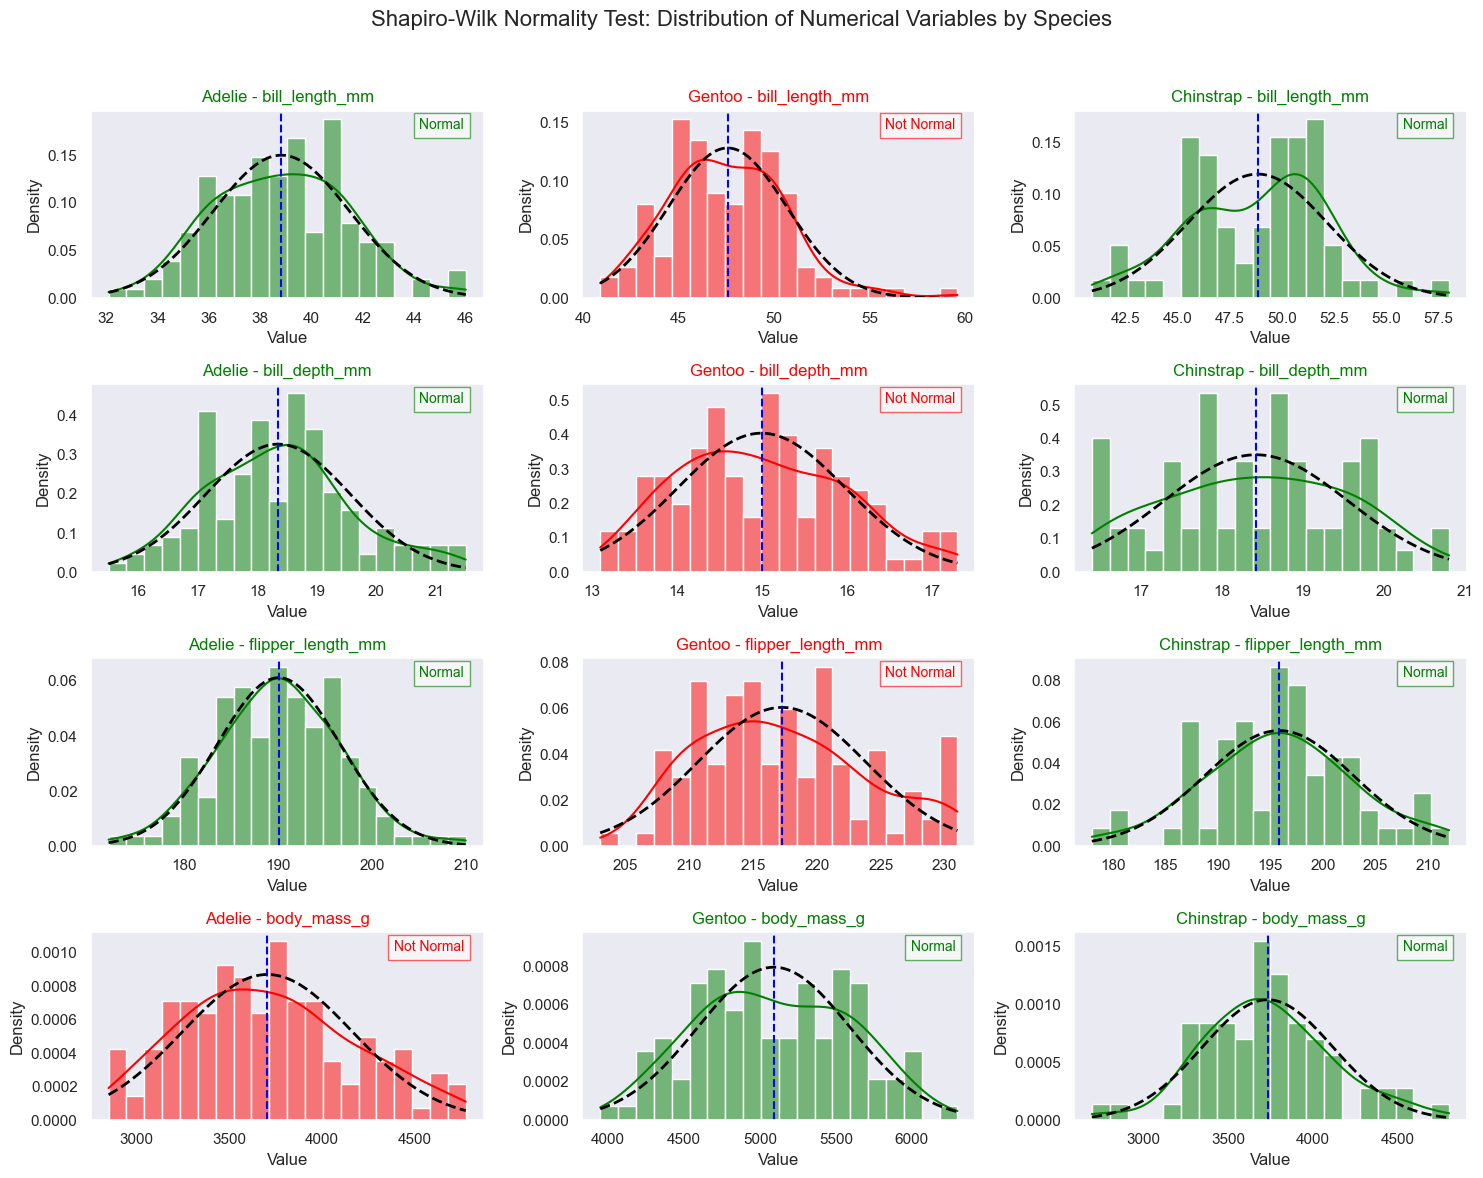

                             W-statistic   p-value
Adelie    bill_length_mm        0.992889  0.684841
          bill_depth_mm         0.984688  0.104722
          flipper_length_mm     0.993405  0.742743
          body_mass_g           0.981161  0.042322
Chinstrap bill_length_mm        0.975250  0.194093
          bill_depth_mm         0.972743  0.141785
          flipper_length_mm     0.988911  0.810645
          body_mass_g           0.984494  0.560508
Gentoo    bill_length_mm        0.973789  0.019894
          bill_depth_mm         0.977561  0.043826
          flipper_length_mm     0.961477  0.001760
          body_mass_g           0.986061  0.260525


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm

# Función para realizar el test de normalidad y graficar histogramas
def normality_test_and_plot(df, numerical_cols, group_by="species"):
    # Crear un diccionario para almacenar los resultados del test de normalidad
    normality_results = {}

    # Agrupar el DataFrame por la columna especificada y aplicar el test de normalidad a cada grupo
    for group_name, group in df.groupby(group_by):  # Iterar sobre cada grupo
        normality_results[group_name] = {}  # Crear un subdiccionario para almacenar los resultados del grupo

        # Iterar sobre cada variable numérica
        for col in numerical_cols:
            data = group[col].dropna()  # Eliminar valores NaN antes de realizar el test

            # Aplicar el test de Shapiro-Wilk para evaluar la normalidad
            stat, p_value = shapiro(data)

            # Guardar los resultados en el diccionario
            normality_results[group_name][col] = {"W-statistic": stat, "p-value": p_value}

    # Convertir el diccionario de resultados en un DataFrame para una mejor visualización
    normality_df = pd.DataFrame.from_dict(
        {(group_name, col): values for group_name, cols in normality_results.items() for col, values in cols.items()}, 
        orient='index'  # Usar un índice jerárquico (grupo, variable)
    )

    # Función para asignar un color basado en el resultado del test de normalidad
    def get_color(p_value, alpha=0.05):
        """
        Asigna un color basado en el resultado del test de normalidad:
        - Verde ("green") si la distribución es normal (p-value > alpha)
        - Rojo ("red") si la distribución no es normal (p-value <= alpha)
        """
        return "green" if p_value > alpha else "red"

    # Crear la figura y los ejes para los histogramas
    fig, axes = plt.subplots(len(numerical_cols), len(df[group_by].unique()), figsize=(15, 12))
    fig.suptitle(f"Test de Normalidad Shapiro-Wilk: Distribución de Variables Numéricas por {group_by.capitalize()}", fontsize=16)

    # Obtener la lista de grupos únicos
    group_list = df[group_by].unique()

    # Iterar sobre cada variable numérica y grupo para generar los histogramas
    for row, col_name in enumerate(numerical_cols):  # Iterar sobre variables numéricas
        for col, group_name in enumerate(group_list):  # Iterar sobre cada grupo
            ax = axes[row, col]  # Seleccionar el subplot correspondiente

            # Extraer los datos de la variable y grupo actual, eliminando valores NaN
            data = df[df[group_by] == group_name][col_name].dropna()

            # Obtener el p-value del test de normalidad para esta variable y grupo
            p_value = normality_results[group_name][col_name]["p-value"]
            color = get_color(p_value)  # Determinar el color del gráfico según la normalidad

            # Graficar el histograma con la distribución ajustada
            sns.histplot(data, kde=True, bins=20, color=color, ax=ax, stat="density")

            # Superponer una curva de distribución normal teórica
            mean, std = data.mean(), data.std()  # Calcular la media y la desviación estándar
            x = np.linspace(data.min(), data.max(), 100)  # Valores para la curva
            y = norm.pdf(x, mean, std)  # Calcular la curva normal
            ax.plot(x, y, color="black", linestyle="dashed", linewidth=2)  # Graficar la curva

            # Configurar el título y las etiquetas
            ax.set_title(f"{group_name} - {col_name}", color=color, fontsize=12)  # Título en color
            ax.set_xlabel("Valor")  # Etiqueta del eje X
            ax.set_ylabel("Densidad")  # Etiqueta del eje Y
            ax.axvline(mean, color="blue", linestyle="dashed", label="Media")  # Línea de la media

            # Agregar texto indicando si la distribución es normal o no
            normal_text = "Normal" if color == "green" else "No Normal"
            ax.text(0.95, 0.9, normal_text, transform=ax.transAxes, fontsize=10,
                    color=color, ha="right", bbox=dict(facecolor="white", alpha=0.6, edgecolor=color))

    # Ajustar el diseño de los gráficos
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Mostrar los histogramas
    plt.show()

    # Mostrar los resultados del test de normalidad
    print(normality_df)

# Ejemplo de uso
numerical_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

# Elegir si agrupar por "species" o "sex"
group_by_column = "sex"  # Cambiar esto a "species" si es necesario

# Llamar a la función
normality_test_and_plot(df, numerical_cols, group_by=group_by_column)

# 📊 TEST DE NORMALIDAD KOLMOGOROV-SMIRNOV (KS) AGRUPANDO POR ESPECIE


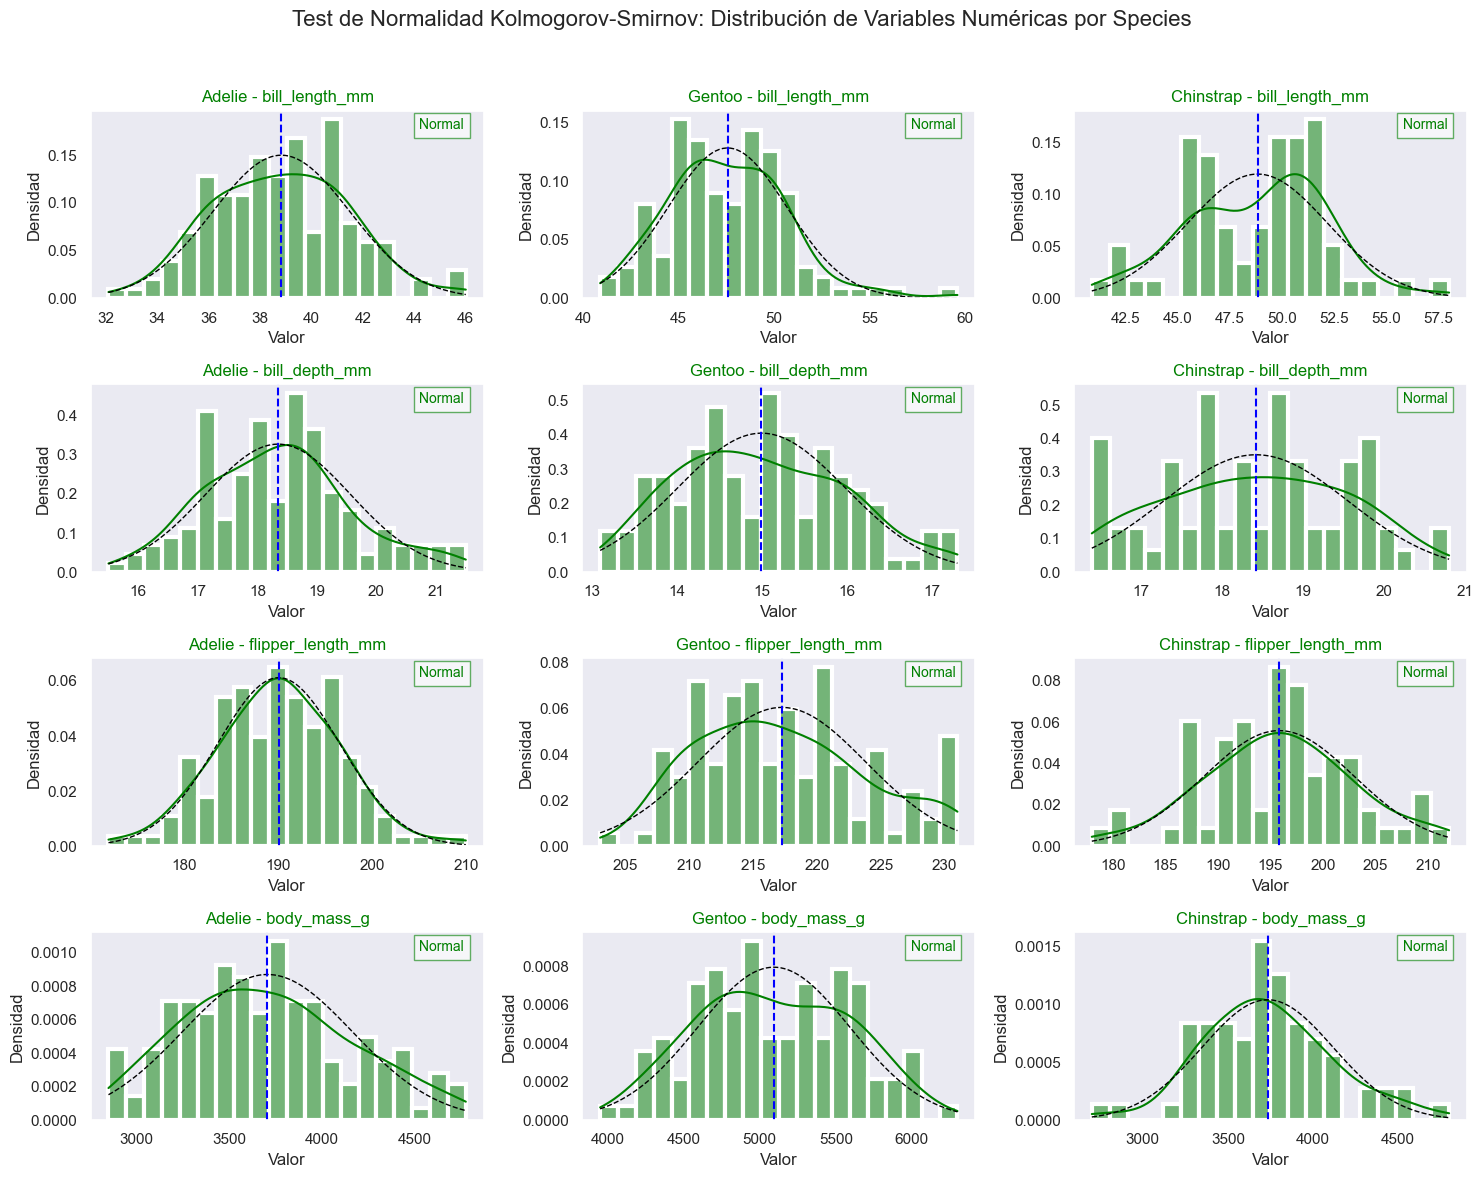

                             KS-statistic   p-value
Adelie    bill_length_mm         0.040904  0.959172
          bill_depth_mm          0.056487  0.718281
          flipper_length_mm      0.069058  0.468564
          body_mass_g            0.071620  0.422564
Chinstrap bill_length_mm         0.093769  0.556361
          bill_depth_mm          0.073463  0.830187
          flipper_length_mm      0.056977  0.971039
          body_mass_g            0.092659  0.571478
Gentoo    bill_length_mm         0.059837  0.764784
          bill_depth_mm          0.084829  0.339430
          flipper_length_mm      0.095042  0.218334
          body_mass_g            0.069124  0.595713


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 🔹 Función para asignar color según el resultado del test de normalidad
def get_color(p_value, alpha=0.05):
    """
    Asigna un color según el resultado del test de normalidad:
    - Verde ("green") si la distribución es normal (p-value > alpha)
    - Rojo ("red") si la distribución no es normal (p-value <= alpha)
    """
    return "green" if p_value > alpha else "red"

# 🔹 Función para realizar el test de Kolmogorov-Smirnov y graficar histogramas
def ks_test_and_plot(df, numerical_cols, group_by="species"):
    # Diccionario para almacenar los resultados del test de Kolmogorov-Smirnov
    normality_results_ks = {}

    # 🔹 Aplicar el test KS a cada variable numérica, agrupando por la columna especificada
    for group_name, group in df.groupby(group_by):  # Iterar por grupo
        normality_results_ks[group_name] = {}
        for col in numerical_cols:  # Iterar por cada variable numérica
            data = group[col].dropna()  # Eliminar valores NaN

            # Aplicar el test de Kolmogorov-Smirnov
            stat, p_value = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
            
            # Guardar resultados en el diccionario
            normality_results_ks[group_name][col] = {"KS-statistic": stat, "p-value": p_value}

    # 🔹 Convertir los resultados en un DataFrame para facilitar su lectura
    normality_df_ks = pd.DataFrame.from_dict(
        {(group_name, col): values for group_name, cols in normality_results_ks.items() for col, values in cols.items()},
        orient='index'
    )

    # 📊 CREACIÓN DE HISTOGRAMAS CON LOS RESULTADOS DEL TEST KS

    # 🔹 Crear la figura y los ejes para los histogramas
    fig, axes = plt.subplots(len(numerical_cols), len(df[group_by].unique()), figsize=(15, 12))
    fig.suptitle(f"Test de Normalidad Kolmogorov-Smirnov: Distribución de Variables Numéricas por {group_by.capitalize()}", fontsize=16)

    # Obtener la lista de grupos únicos
    group_list = df[group_by].unique()

    # 🔹 Iterar sobre cada variable numérica y grupo para generar los histogramas
    for row, col_name in enumerate(numerical_cols):  # Iterar sobre variables numéricas
        for col, group_name in enumerate(group_list):  # Iterar sobre cada grupo
            ax = axes[row, col]  # Seleccionar el subplot correspondiente

            # Extraer los datos de la variable y grupo actual, eliminando valores NaN
            data = df[df[group_by] == group_name][col_name].dropna()

            # Obtener el p-value del test de normalidad para esta variable y grupo
            p_value = normality_results_ks[group_name][col_name]["p-value"]
            color = get_color(p_value)  # Determinar el color del gráfico según la normalidad

            # 🔹 Graficar el histograma con la distribución ajustada
            sns.histplot(data, kde=True, bins=20, color=color, ax=ax, stat="density", linewidth=3)

            # 🔹 Superponer una curva de distribución normal teórica
            mean, std = data.mean(), data.std()  # Calcular media y desviación estándar
            x = np.linspace(data.min(), data.max(), 100)  # Valores para la curva
            y = stats.norm.pdf(x, mean, std)  # Calcular la curva normal
            ax.plot(x, y, color="black", linestyle="dashed", linewidth=1)  # Graficar curva

            # 🔹 Configurar título y etiquetas
            ax.set_title(f"{group_name} - {col_name}", color=color, fontsize=12)  # Título en color
            ax.set_xlabel("Valor")  # Etiqueta del eje X
            ax.set_ylabel("Densidad")  # Etiqueta del eje Y
            ax.axvline(mean, color="blue", linestyle="dashed", label="Media")  # Línea de la media

            # 🔹 Agregar texto indicando si la distribución es normal o no
            normal_text = "Normal" if color == "green" else "No Normal"
            ax.text(0.95, 0.9, normal_text, transform=ax.transAxes, fontsize=10,
                    color=color, ha="right", bbox=dict(facecolor="white", alpha=0.6, edgecolor=color))

    # Ajustar el diseño de los gráficos
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # 🔹 Mostrar los histogramas
    plt.show()

    # 📋 MOSTRAR RESULTADOS DEL TEST KS EN FORMATO TABLA
    print(normality_df_ks)

# Ejemplo de uso
numerical_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

# Elegir si agrupar por "species" o "sex"
group_by_column = "species"  # Cambiar esto a "species" si es necesario

# Llamar a la función
ks_test_and_plot(df, numerical_cols, group_by=group_by_column)

## 📊 Evaluación de Normalidad y Elección de Estadísticos  

Tras ejecutar el **test de Kolmogorov-Smirnov**, observamos que todas las variables, para cada una de las especies, siguen una **distribución normal**.  

### ✅ ¿Qué significa esto?  
Cuando los datos son normales, podemos utilizar **tests paramétricos**, ya que estos asumen que la distribución de los datos sigue una curva de campana.  

📌 **En este caso, utilizamos como estadísticos de primer orden:**  
- **Media**: Representa el valor central de la distribución.  
- **Desviación estándar**: Mide la dispersión de los datos con respecto a la media.  

---

### ❌ ¿Y si los datos no fueran normales?  
Si los datos no siguen una distribución normal (**p-value ≤ 0.05** en Shapiro-Wilk o Kolmogorov-Smirnov), debemos emplear **tests no paramétricos**, ya que estos no requieren la suposición de normalidad.  

📌 **En este caso, utilizamos:**  
- **Mediana**: Más robusta que la media ante valores atípicos.  
- **Rango intercuartílico (IQR)**: Mide la dispersión utilizando los cuartiles en lugar de la desviación estándar.  

📢 **Conclusión**: Dado que nuestras variables son normales, utilizaremos **tests paramétricos**, como *t-test* o *ANOVA*, para comparar grupos. En caso contrario, recurriríamos a alternativas no paramétricas, como *Mann-Whitney U* o *Kruskal-Wallis*.  


Ahora que sabemos como son nuestras muestras, vamos a proceder a explorar algunas preguntas sencillas que pueden orientar futuros analisis:

#### Como se distribuye el numero de muestras por isla?

Text(0.5, 1.0, 'Distribución de Muestras por Isla')

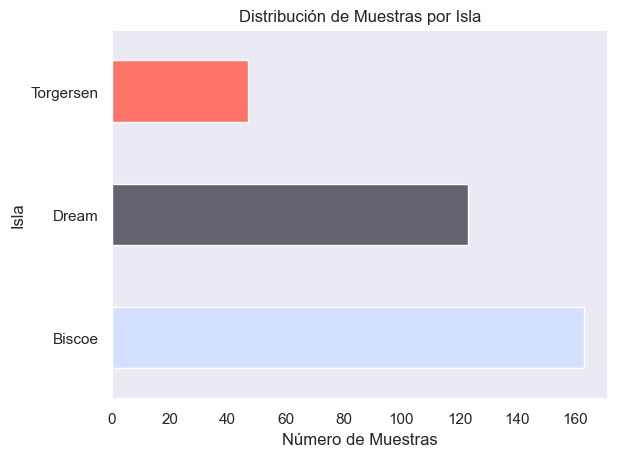

In [70]:
df['island'].value_counts().plot(kind='barh', color=['#d5e0fe', '#656371', '#ff7369'])
plt.xlabel("Número de Muestras")  # ✅ Establece la etiqueta del eje x
plt.ylabel("Isla")  # (Opcional) Establece la etiqueta del eje y si es necesario
plt.title("Distribución de Muestras por Isla")  # (Opcional) Añade un título

#### Cuantas muestras de cada especie se han tomado a lo largo del estudio?

Text(0.5, 1.0, 'Distribución de Muestras por Especie')

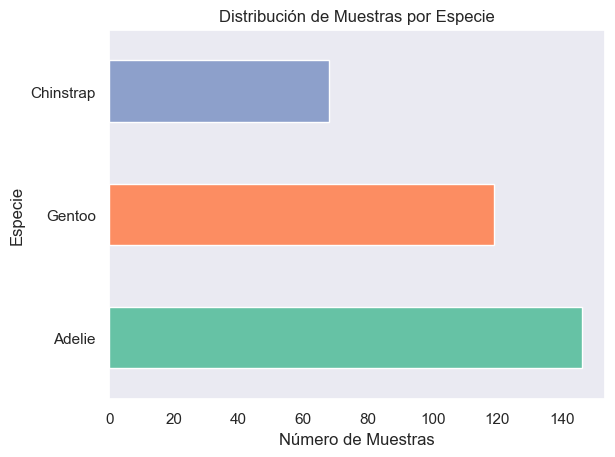

In [71]:
color_species = ['#66c2a5', '#fc8d62', '#8da0cb']

df['species'].value_counts().plot(kind='barh', color= color_species)
plt.xlabel("Número de Muestras")  # ✅ Establece la etiqueta del eje x
plt.ylabel("Especie")  # (Opcional) Establece la etiqueta del eje y si es necesario
plt.title("Distribución de Muestras por Especie")  # (Opcional) Añade un título

### Pero, como se distribuyen cada una de las especies muestreadas? Estan todas presentes en cada isla? <p>

### Hay diferencias en las caracteristicas fisicas en los individuos de una misma especie, de una isla a otra?<p>

Text(0.5, 1.0, 'Distribución de Longitud del Pico por Isla y Especie')

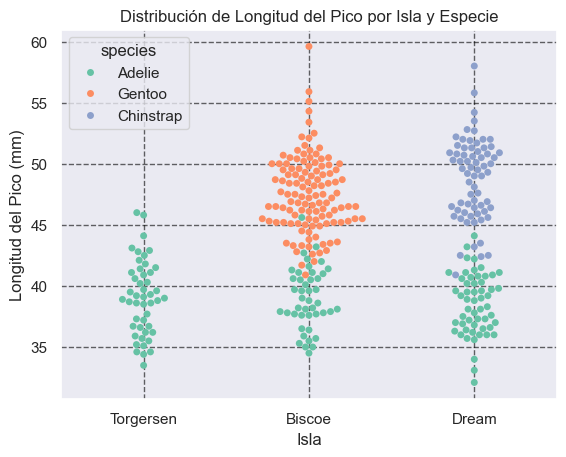

In [72]:
sns.swarmplot(x=df.island, y=df.bill_length_mm, hue=df.species, palette= color_species)
# Agregar cuadrícula en negro
plt.grid(True, linestyle='--', alpha=0.6, color='black')

# Modificar el nombre del eje x y eje y en español
plt.xlabel("Isla")  # Nombre del eje x en español
plt.ylabel("Longitud del Pico (mm)")  # Nombre del eje y en español

# (Opcional) Añadir un título en español
plt.title("Distribución de Longitud del Pico por Isla y Especie")

### Hemos visto diferencias entre individuos de la misma especie, pero, y entre sexos? 
### Hay diferencias entre el peso de los machos y las hembras de cada una de las islas?

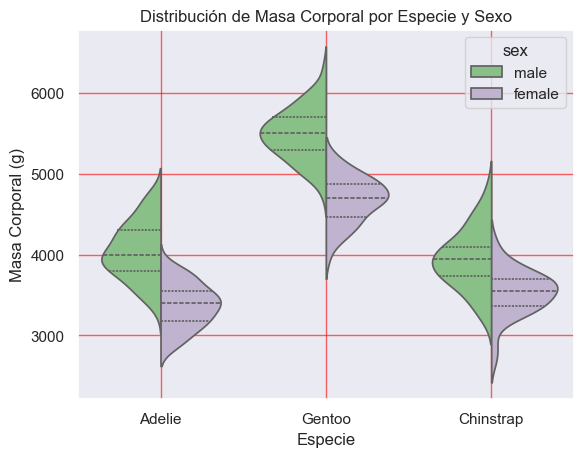

In [73]:
# Crear el gráfico de violín
sns.violinplot(data=df, 
               x=df.species, 
               y=df.body_mass_g, 
               hue=df.sex,
               split=True, 
               inner="quart", 
               fill=True,
                palette={"male": "#7fc97f", "female": "#beaed4"})   # Nueva combinación de colores

# Agregar cuadrícula en negro
plt.grid(True, linestyle='-', alpha=0.6, color='red')

# Etiquetas y título
plt.xlabel("Especie")
plt.ylabel("Masa Corporal (g)")
plt.title("Distribución de Masa Corporal por Especie y Sexo")

# Mostrar el gráfico
plt.show()

### Visualización de la relación entre longitud y profundidad del pico
Ahora vamos a explorar cómo se caracterizan las especies de pingüinos en función de dos variables numéricas: la longitud del pico ('bill_length_mm') y la profundidad del pico ('bill_depth_mm').

Para ello, utilizaremos un gráfico hexagonal 2D (hexbin), que nos permite visualizar la densidad de puntos en función de estas dos variables. Este tipo de gráfico es especialmente útil cuando trabajamos con grandes conjuntos de datos, ya que nos ayuda a identificar zonas de agregación o concentración de puntos, lo que puede estar relacionado con características específicas de las especies.

Código utilizado:

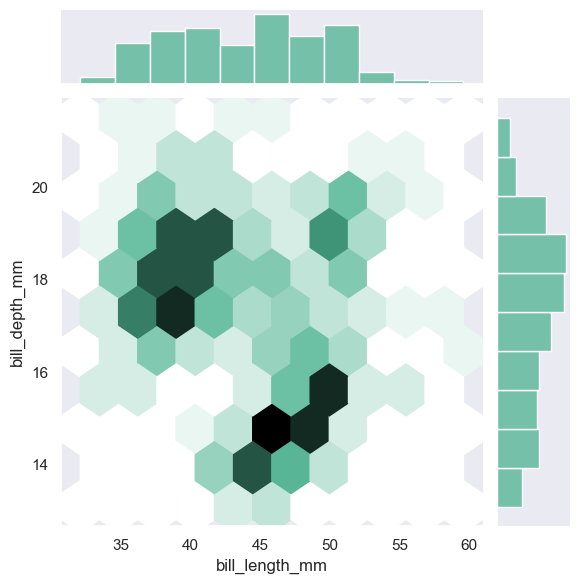

In [74]:
sns.jointplot(
    data=df,  # DataFrame con los datos
    x="bill_length_mm",  # Longitud del pico en el eje x
    y="bill_depth_mm",  # Profundidad del pico en el eje y
    color="#4CB391",  # Color del gráfico (verde azulado)
    kind="hex"  # Tipo de gráfico: hexagonal para densidad
)

# Análisis de la visualización actual

Observemos con atención la gráfica presentada. ¿Creéis que es posible extraer información clara sobre las especies de pingüinos
a partir de esta representación? ¿O podríamos mejorarla para obtener insights más significativos?

Una parte fundamental del análisis de datos es **mostrar y visualizar la información de manera efectiva**. Una visualización bien
diseñada no solo facilita la interpretación de los datos, sino que también permite identificar patrones, tendencias y
diferencias entre grupos (en este caso, entre especies).

## Problemas con la gráfica actual

- **Falta de claridad**: La gráfica no distingue entre las diferentes especies, lo que dificulta la extracción de información relevante.
- **Limitaciones visuales**: Al no utilizar colores o elementos que diferencien las especies, es imposible identificar cómo las
  características del pico varían entre ellas.
- **Pérdida de contexto**: Sin una representación adecuada, no podemos sacar conclusiones sobre las diferencias morfológicas
  entre las especies.

## Conclusión

Esta gráfica **NO es un buen ejemplo** de cómo representar las diferencias entre especies basándonos en las características del pico.
Para lograr una visualización más efectiva, utilizaremos una gráfica mejorada que incorpore elementos como colores, formas o
agrupaciones para distinguir claramente las especies.

# Crear la gráfica mejorada

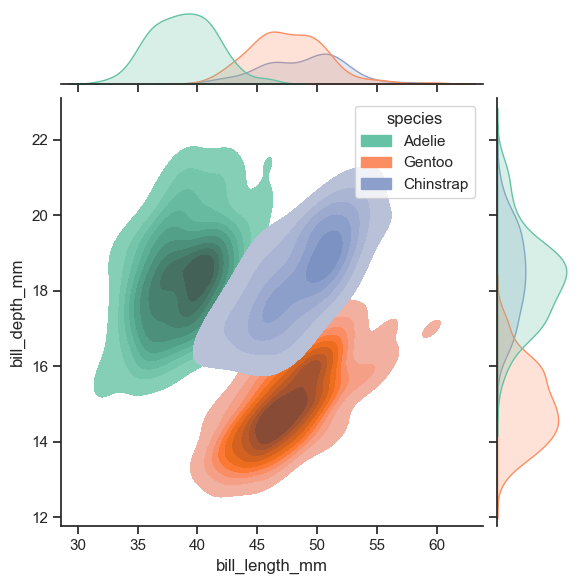

In [75]:
# Debemos indicar los datos y las variables que se graficarán.
# data=df (usamos el DataFrame df)
# eje x="bill_length_mm" (longitud del pico)
# eje y="bill_depth_mm" (profundidad del pico)
# hue="species" (en este caso, la variable categórica: especie)

sns.set_theme(style="ticks")  # Establecer el tema "ticks" para el gráfico, hay muchos temas, os animo a probar otros :)

# Crear un gráfico conjunto (jointplot) con densidad (kde)
sns.jointplot(
    data=df,  # Datos a utilizar
    x="bill_length_mm",  # Variable para el eje x: longitud del pico
    y="bill_depth_mm",  # Variable para el eje y: profundidad del pico
    hue="species",  # Diferenciar por especie usando colores
    palette=color_species,  # Paleta de colores personalizada para las especies
    fill=True,  # Rellenar las áreas de densidad
    kind="kde",  # Tipo de gráfico: densidad (kde)
)

plt.show()  # Mostrar el gráfico creado



## 🔍 Características:  
- **Tipo de gráfico**: Densidad (*kde*), que muestra la distribución de los datos utilizando curvas de densidad.  
- **Colores**: Usa una paleta de colores (`color_species`) para diferenciar especies, lo que permite una identificación visual clara.  
- **Información visual**: Representa la densidad de datos para cada especie por separado, facilitando la comparación entre ellas.  

## ✅ Ventajas:  
✔ **Diferenciación por especie**: Con `hue="species"`, se distingue cada especie, permitiendo identificar patrones y agrupaciones.  
✔ **Mayor claridad**: Las curvas de densidad (*kde*) son más intuitivas para interpretar la distribución de datos que los hexágonos.  
✔ **Contexto adicional**: El uso de colores y la leyenda proporciona más información sobre las especies, enriqueciendo el análisis.  

## 🎯 ¿Por qué este gráfico es mejor?  
🔹 **Diferenciación clara**: Permite distinguir fácilmente entre especies, fundamental para analizar variaciones en las características del pico.  
🔹 **Visualización más intuitiva**: Las curvas de densidad (*kde*) son más fáciles de interpretar que los hexágonos, especialmente al comparar múltiples grupos.  
🔹 **Información enriquecida**: La paleta de colores y la leyenda añaden contexto, facilitando la extracción de insights.  

## 📌 Conclusión  
El nuevo gráfico no solo es más atractivo visualmente, sino también **más informativo y útil** para el análisis de datos.  
Al diferenciar las especies y utilizar curvas de densidad, podemos identificar patrones y tendencias **que no eran visibles en el gráfico anterior**.  

 **Este ejemplo demuestra la importancia de elegir la visualización adecuada** para contar una historia clara y efectiva con los datos.  


## 🔍 Exploración de Correlaciones en los Datos  

Para analizar la relación entre nuestras variables numéricas, ejecutamos el siguiente comando:  


In [76]:
correlation_matrix=df.select_dtypes(include=["number"]).corr()
correlation_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


## 📌 Explicación del Código

- **`df.select_dtypes(include=["number"])`**: Filtra el *DataFrame* para seleccionar solo las columnas numéricas, ya que la correlación solo se puede calcular entre variables numéricas.  
- **`.corr()`**: Calcula la **matriz de correlación**, que mide el grado de relación entre las variables numéricas del conjunto de datos.  
  - Valores cercanos a **1** indican una fuerte **correlación positiva**.  
  - Valores cercanos a **-1** indican una fuerte **correlación negativa**.  
  - Valores cercanos a **0** indican una **correlación débil o inexistente**.  

## 🔥 ¿Por qué es mejor usar un *heatmap* para visualizar la correlación?  
Si bien la matriz de correlación nos da información numérica, su interpretación puede ser difícil cuando hay muchas variables.

Un **heatmap** (*mapa de calor*) es una mejor opción porque:  
✅ **Proporciona una visión clara y rápida** de qué variables están más correlacionadas mediante colores.  
✅ **Permite identificar patrones visualmente**, sin necesidad de analizar números individuales.  
✅ **Facilita la detección de relaciones importantes**, como colinealidades que pueden afectar modelos de predicción.  

### 🎨 Para graficarlo en *Seaborn*, podemos usar:


<Axes: >

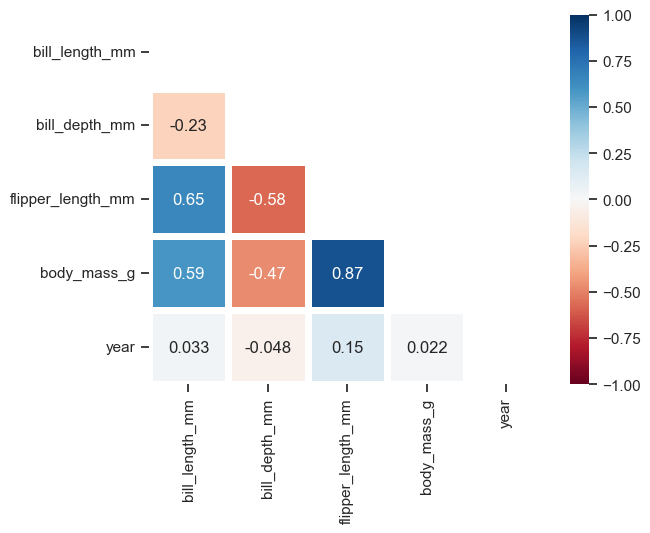

In [77]:
# Crea una máscara para ocultar la parte superior de la matriz de correlación,
# ya que es simétrica y no es necesario mostrar valores duplicados.
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Genera un heatmap (mapa de calor) con la matriz de correlación
sns.heatmap(correlation_matrix,  # Matriz de correlación como datos de entrada
            annot=True,          # Muestra los valores numéricos dentro de cada celda
            linecolor='white',   # Color de las líneas que separan las celdas
            linewidths=5,        # Grosor de las líneas de separación
            cmap="RdBu",         # Paleta de colores (rojo y azul para valores negativos y positivos)
            vmin=-1,             # Valor mínimo de la escala (correlación negativa máxima)
            vmax=1,              # Valor máximo de la escala (correlación positiva máxima)
            mask = mask)             


# 📌 Ventajas de usar `pairplot` en Seaborn  

El siguiente código genera un **`pairplot`**, una herramienta poderosa para visualizar relaciones entre múltiples variables numéricas:  


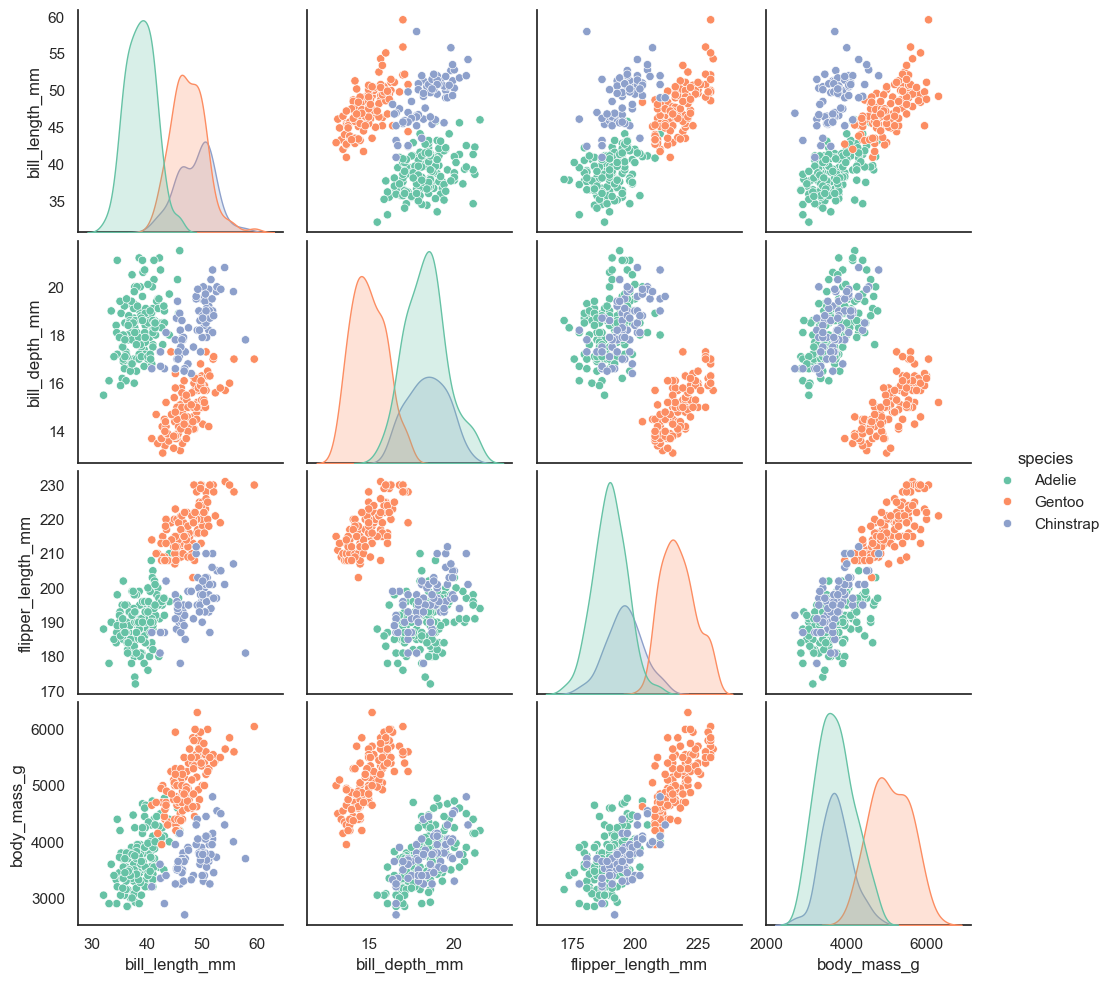

In [78]:
sns.set_style(style='white')
sns.pairplot(data=df.loc[:, df.columns != 'year'], hue='species', palette = color_species)


## 🔍 ¿Qué nos muestra esta figura?  

### ✅ Distribución de cada variable  
- En la diagonal del gráfico, se muestran histogramas o gráficos de densidad que representan la distribución individual de cada variable numérica.  
- Esto nos permite detectar si los datos tienen sesgo o posibles valores atípicos.  

### ✅ Relaciones entre variables  
- En las otras celdas del gráfico, se crean diagramas de dispersión (*scatter plots*) entre pares de variables.  
- Podemos ver si existe una **correlación positiva o negativa** entre ellas.  

### ✅ Diferenciación entre especies  
- Gracias al parámetro `hue='species'`, cada especie se representa con un color diferente, permitiendo identificar **patrones y diferencias** en las características de los pingüinos.  

## 🎯 Ventajas del `pairplot`  

✔ **Visualización clara de tendencias y relaciones** entre variables.  
✔ **Identificación rápida de outliers** (valores atípicos) en los datos.  
✔ **Comparación entre categorías** (en este caso, especies de pingüinos).  
✔ **Fácil de interpretar**, sin necesidad de cálculos estadísticos complejos.  

Este gráfico es especialmente útil en **Análisis Exploratorio de Datos (EDA)** porque permite detectar **correlaciones, clusters o estructuras ocultas** en los datos antes de aplicar modelos estadísticos o de Machine Learning. 🚀  


https://www.kaggle.com/code/pratik1120/penguin-dataset-eda-classification-and-clustering

https://pmc.ncbi.nlm.nih.gov/articles/PMC6350423/#:~:text=The%20Shapiro%E2%80%93Wilk%20test%20is,taken%20from%20normal%20distributed%20population.